In [1]:
import os 
from glob import glob 
import pandas as pd
import numpy as np

from PIL import Image, ImageColor
import matplotlib.pyplot as plt

import torch
import cv2
import supervision as sv

import time
# from backend.disentangle_concepts import *
# import dnnlib 
# import legacy
# from backend.color_annotations import *


%load_ext autoreload
%autoreload 2

In [2]:
images_textiles = glob('/Users/ludovicaschaerf/Desktop/TextAIles/TextileGAN/Original Textiles/*')

In [3]:
import torch

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"

import sys
sys.path.append('segment-anything')
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

CHECKPOINT_PATH = "/Users/ludovicaschaerf/Desktop/latent-space-theories/segment-anything/sam_vit_h_4b8939.pth"
sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)

In [4]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [24]:
mask_generator = SamAutomaticMaskGenerator(sam)

image_bgr = cv2.imread(images_textiles[3])
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

In [25]:
t0 = time.time()
sam_result = mask_generator.generate(image_rgb)
dt = time.time()-t0
print("dt = {} seconds".format(dt)) 

dt = 535.8082618713379 seconds


In [26]:
import supervision as sv

mask_annotator = sv.MaskAnnotator()
detections = sv.Detections.from_sam(sam_result)
annotated_image = mask_annotator.annotate(image_bgr, detections)


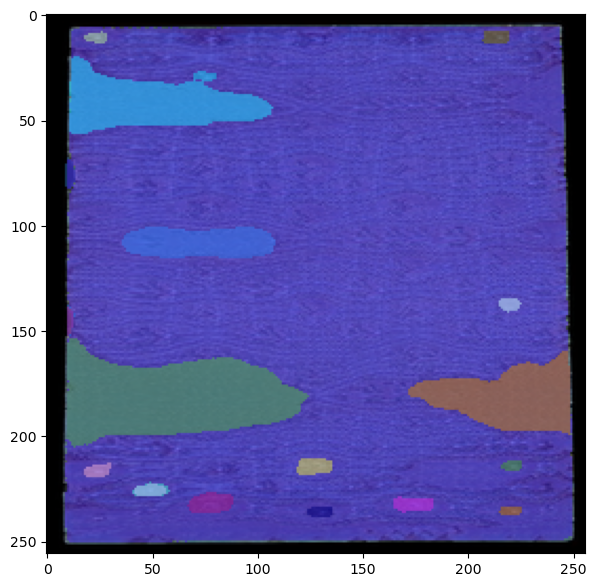

In [27]:

# Show the annotated image
plt.figure(figsize=(7,7))
plt.imshow(annotated_image)
plt.axis('on')
plt.show()

In [28]:
detections.xyxy.shape

(22, 4)

[[1.64516129 1.16145833]
 [1.6190028  1.55072021]
 [1.39273563 1.90881348]
 [1.36563209 2.07094828]
 [1.41890987 2.11901347]
 [1.58537046 2.02779643]
 [1.63892389 2.04781087]
 [1.62952054 2.54237874]
 [1.68428679 2.66328939]
 [1.74618038 2.57378642]
 [1.82910156 2.14375814]
 [1.90443076 2.73064168]
 [1.95303049 2.82560221]
 [1.99933845 2.71852621]
 [2.01036416 2.16890462]
 [2.12014869 2.60113525]
 [2.18679908 2.70462036]
 [2.22532998 2.67514547]
 [2.2365762  2.59857178]
 [2.18477114 2.08056132]
 [2.3331732  2.36368815]
 [2.37913858 2.35359192]
 [2.40409999 2.26980591]
 [2.37277123 2.12281291]
 [2.17408408 1.64048259]
 [2.07782258 1.16666667]]
Number of coordinates: 22 704 26
Number of coordinates: 1173 32 9
Number of coordinates: 701 21 5


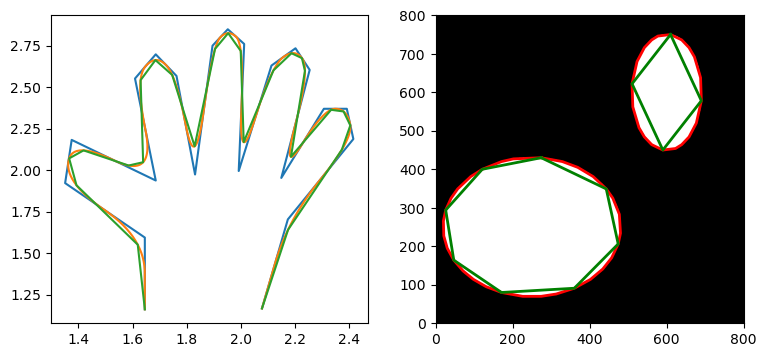

In [23]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.draw import ellipse
from skimage.measure import find_contours, approximate_polygon, \
    subdivide_polygon


hand = np.array([[1.64516129, 1.16145833],
                 [1.64516129, 1.59375],
                 [1.35080645, 1.921875],
                 [1.375, 2.18229167],
                 [1.68548387, 1.9375],
                 [1.60887097, 2.55208333],
                 [1.68548387, 2.69791667],
                 [1.76209677, 2.56770833],
                 [1.83064516, 1.97395833],
                 [1.89516129, 2.75],
                 [1.9516129, 2.84895833],
                 [2.01209677, 2.76041667],
                 [1.99193548, 1.99479167],
                 [2.11290323, 2.63020833],
                 [2.2016129, 2.734375],
                 [2.25403226, 2.60416667],
                 [2.14919355, 1.953125],
                 [2.30645161, 2.36979167],
                 [2.39112903, 2.36979167],
                 [2.41532258, 2.1875],
                 [2.1733871, 1.703125],
                 [2.07782258, 1.16666667]])

# subdivide polygon using 2nd degree B-Splines
new_hand = hand.copy()
for _ in range(5):
    new_hand = subdivide_polygon(new_hand, degree=2, preserve_ends=True)

# approximate subdivided polygon with Douglas-Peucker algorithm
appr_hand = approximate_polygon(new_hand, tolerance=0.02)
print("Number of coordinates:", len(hand), len(new_hand), len(appr_hand))

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(9, 4))

ax1.plot(hand[:, 0], hand[:, 1])
ax1.plot(new_hand[:, 0], new_hand[:, 1])
ax1.plot(appr_hand[:, 0], appr_hand[:, 1])


# create two ellipses in image
img = np.zeros((800, 800), 'int32')
rr, cc = ellipse(250, 250, 180, 230, img.shape)
img[rr, cc] = 1
rr, cc = ellipse(600, 600, 150, 90, img.shape)
img[rr, cc] = 1

plt.gray()
ax2.imshow(img)

# approximate / simplify coordinates of the two ellipses
for contour in find_contours(img, 0):
    coords = approximate_polygon(contour, tolerance=2.5)
    ax2.plot(coords[:, 1], coords[:, 0], '-r', linewidth=2)
    coords2 = approximate_polygon(contour, tolerance=39.5)
    ax2.plot(coords2[:, 1], coords2[:, 0], '-g', linewidth=2)
    print("Number of coordinates:", len(contour), len(coords), len(coords2))

ax2.axis((0, 800, 0, 800))

plt.show()

In [ ]:
images = []

for step in [10, 20]:
    imh = np.zeros((200, 200))
    imv = np.zeros((200, 200))
    imb = np.ones((200, 200))
    imb2 = np.ones((200, 200))
    
    for x,y in zip(range(0,200, step*2),range(step, 200, step*2)):
        imh[x:y, :] = 255
        imv[:, x:y] = 255
        imb[x:y, :] = 0
        imb[:, x:y] = 0
        imb2[x:y, :] = 0
        imb2[:, x*2:y*2] = 0
    
    images.append(imh)        
    images.append(imb)        
    images.append(imb2)        
    images.append(imv)        

for im in images:
    plt.imshow(im, cmap='gray')
    plt.title('Original Image')
    plt.show()

In [ ]:
def get_freqs(image):
    
    # Load the image
    # image = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    # Center crop the image to remove black borders
    height, width = image.shape
    short_side = min(height, width)
    crop_size = min(200, short_side)
    center_x = width // 2
    center_y = height // 2
    crop_half_size = crop_size // 2
    image = image[center_y - crop_half_size:center_y + crop_half_size,
                        center_x - crop_half_size:center_x + crop_half_size]

    # kernel = np.ones((5,5), np.float32) / 25
    # image = cv2.filter2D( image, -1, kernel)
    # image = cv2.GaussianBlur(image,(5,5),0)
    # image = image - cv2.GaussianBlur(image, (21, 21), 1) + 127

    # print(np.unique(image))
    # Perform 1D Fourier Transforms
    horizontal_freq = np.fft.fftshift(np.fft.fft(image, axis=1))
    vertical_freq = np.fft.fftshift(np.fft.fft(image, axis=0))
    twod = np.fft.fftshift(np.fft.fft2(image))
    
    # Calculate corresponding frequencies
    num_cols = image.shape[1]
    num_rows = image.shape[0]
    # horizontal_freqs = np.fft.fftshift(np.fft.fftfreq(num_cols))
    # vertical_freqs = np.fft.fftshift(np.fft.fftfreq(num_rows))
    
    horizontal_freqs = np.fft.fftfreq(num_cols)
    vertical_freqs = np.fft.fftfreq(num_rows)
    
    # # Sum power along the second axis
    # twod = twod.real*twod.real + twod.imag*twod.imag
    # twod = twod.sum(axis=1)/twod.shape[1]

    # # Round up the size along this axis to an even number
    # n = int(math.ceil(image.shape[0] / 2.) * 2 )

    # # Generate a list of frequencies
    # f = np.fft.fftfreq(n)

    # # Graph it
    # plt.plot(f[1:],a[1:], label = 'sum of amplitudes over y vs f_x')

    

    # Calculate magnitude spectra
    horizontal_magnitudes = np.abs(horizontal_freq)[0]
    vertical_magnitudes = np.abs(vertical_freq)[0]
    
    # # Find peaks in the magnitudes
    # horizontal_peaks, _ = find_peaks(horizontal_magnitudes, height=100)  # Adjust height threshold as needed
    # vertical_peaks, _ = find_peaks(vertical_magnitudes, height=10)      # Adjust height threshold as needed

    print('Median horizontal frequency', np.median(horizontal_magnitudes), ', median vertical frequency', np.median(vertical_magnitudes))
    # Plot frequency analysis with peaks
    plt.figure(figsize=(25, 5))

    # Plot frequency analysis
    plt.subplot(1, 6, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 6, 2)
    plt.imshow(np.log(1 + np.abs(horizontal_freq)), cmap='gray')
    plt.title('Horizontal Frequency Analysis')

    plt.subplot(1, 6, 3)
    plt.imshow(np.log(1 + np.abs(vertical_freq)), cmap='gray')
    plt.title('Vertical Frequency Analysis')

    plt.subplot(1, 6, 4)
    plt.imshow(np.log(1 + np.abs(twod)), cmap='gray')
    plt.title('2D Frequency Analysis')

    plt.subplot(1, 6, 5)
    plt.scatter(horizontal_freqs[1:], horizontal_magnitudes[1:], s=5)
    # plt.plot(horizontal_freqs[horizontal_peaks], horizontal_magnitudes[horizontal_peaks], 'ro', markersize=5)
    plt.xlabel('Horizontal Frequency')
    plt.ylabel('Magnitude')
    plt.title('Horizontal Frequency Analysis with Peaks')

    plt.subplot(1, 6, 6)
    plt.scatter(vertical_freqs[1:], vertical_magnitudes[1:], s=5)
    # plt.plot(vertical_freqs[vertical_peaks], vertical_magnitudes[vertical_peaks], 'ro', markersize=5)
    plt.xlabel('Vertical Frequency')
    plt.ylabel('Magnitude')
    plt.title('Vertical Frequency Analysis with Peaks')


    plt.show()


When the absolute value of the frequency is high in the context of Fourier analysis, it indicates the presence of a rapidly changing or repeating pattern in the image. The frequency component's absolute value reflects how many cycles of the pattern occur within a fixed interval.

In Fourier analysis:

Higher Frequency Components: Higher absolute frequency values correspond to faster changes or repetitions in the image data. This means that the pattern or feature represented by that frequency component oscillates more rapidly across the image.

Spatial Frequency: In image analysis, frequency is often associated with how quickly the intensity or color changes as you move across the image. High absolute frequency values indicate rapid changes or transitions in the image content.

Fine Details and Textures: Rapidly oscillating frequency components are associated with fine details and textures in the image. For example, in textiles, high-frequency components might capture the intricate weave patterns or small-scale textures.

Small-Scale Features: Patterns that repeat at small scales, such as fine lines or tiny structures, tend to result in high-frequency components with high absolute values.

Edges and Transitions: Edges and sharp transitions between different colors or intensities are also associated with high-frequency components. These transitions involve rapid changes in intensity, leading to higher absolute frequency values.

In [ ]:
import cv2
from scipy.signal import find_peaks

import numpy as np
import matplotlib.pyplot as plt


for image in images:
    get_freqs(image)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from collections import Counter
import seaborn as sns
# Load the image
image = cv2.imread(images_textiles[0], cv2.IMREAD_GRAYSCALE)

# Perform 1D Fourier Transforms
horizontal_freq = np.fft.fftshift(np.fft.fft(image, axis=1))
vertical_freq = np.fft.fftshift(np.fft.fft(image, axis=0))

# Calculate magnitude spectra
horizontal_magnitudes = np.abs(horizontal_freq)[0]
vertical_magnitudes = np.abs(vertical_freq)[0]

# Create histograms of magnitude recurrence
horizontal_magnitude_counter = Counter(np.round(horizontal_magnitudes).astype(int))
vertical_magnitude_counter = Counter(np.round(vertical_magnitudes).astype(int))

# Plot magnitude recurrence histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(list(horizontal_magnitude_counter.elements()), kde=True, color='blue')
plt.xlim(0, 1000)  # Limit x-axis range
plt.xlabel('Magnitude')
plt.ylabel('Recurrence')
plt.title('Horizontal Magnitude Recurrence')

plt.subplot(1, 2, 2)
sns.histplot(list(vertical_magnitude_counter.elements()), kde=True, color='green')
plt.xlim(0, 1000)  # Limit x-axis range
plt.xlabel('Magnitude')
plt.ylabel('Recurrence')
plt.title('Vertical Magnitude Recurrence')

plt.tight_layout()
plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure

# Load the image
image = cv2.imread(images_textiles[4], cv2.IMREAD_GRAYSCALE)

# Center crop the image to remove black borders
height, width = image.shape
crop_size = 200
center_x = width // 2
center_y = height // 2
crop_half_size = crop_size // 2
cropped_image = image[center_y - crop_half_size:center_y + crop_half_size,
                      center_x - crop_half_size:center_x + crop_half_size]

# Compute HOG features
orientations = 9
pixels_per_cell = (5, 5)
cells_per_block = (1,1)
hog_features, hog_image = hog(cropped_image, orientations=orientations,
                              pixels_per_cell=pixels_per_cell,
                              cells_per_block=cells_per_block,
                              block_norm='L2-Hys',
                              visualize=True)

# Plot the HOG image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(cropped_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# Plot the orientation distribution
hog_histogram, _ = np.histogram(hog_features, bins=orientations)
angles_deg = np.arange(0, 180, 180/orientations)
plt.figure(figsize=(6, 4))
plt.bar(angles_deg, hog_histogram, width=180/orientations)
plt.xlabel('Orientation (degrees)')
plt.ylabel('Frequency')
plt.title('Orientation Distribution')
plt.xticks(angles_deg)
plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Load the image
image = cv2.imread(images_textiles[0], cv2.IMREAD_GRAYSCALE)

# Perform Continuous Wavelet Transform (CWT) on each row of the image
wavelet = 'morl'  # You can choose a different wavelet basis
scales = np.arange(1, 20)  # Scales to analyze

cwt_coeffs = []
for row in image:
    coeffs, _ = pywt.cwt(row, scales, wavelet)
    cwt_coeffs.append(coeffs)

cwt_coeffs = np.array(cwt_coeffs)

# Plot scaleograms
plt.figure(figsize=(10, 6))
plt.imshow(np.abs(cwt_coeffs[:, 0, :]), extent=[0, image.shape[1], scales[-1], scales[0]], cmap='viridis', aspect='auto')
plt.colorbar(label='Magnitude')
plt.title('Wavelet Scaleogram')
plt.xlabel('Pixel')
plt.ylabel('Scale')
plt.show()
